In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [26]:
def upsampling_1d_linear(inputs, up_factor):
    outputs = tf.expand_dims(inputs, 2)
    outputs = tf.keras.layers.UpSampling2D(size=(up_factor, 1), interpolation='bilinear')(outputs)
    outputs = tf.squeeze(outputs, 2)
    pad = up_factor // 2
    outputs = tf.concat([inputs[:, 0:1, :]] * pad + [outputs[:, :-pad,:]], axis=1)
    if up_factor % 2 == 0:
        outputs = tf.keras.layers.AveragePooling1D(pool_size=2, strides=1, padding="same")(outputs)
    return outputs

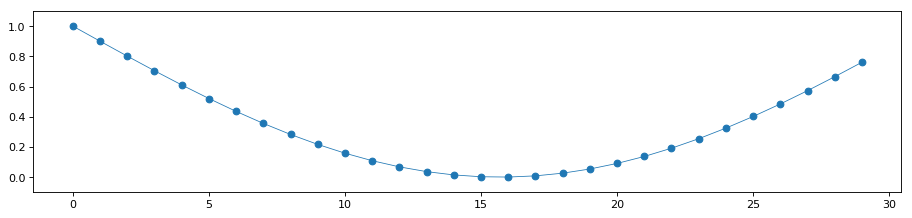

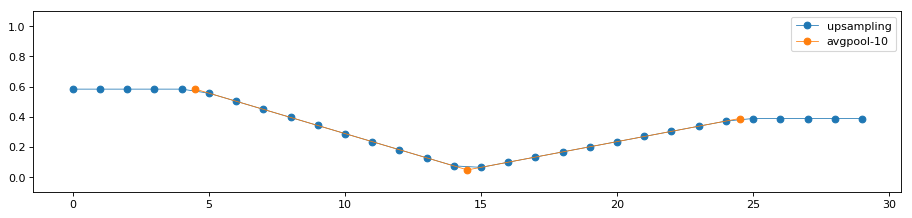

In [30]:
n = 30
f = 10

t = np.arange(n).astype(np.float32)
x = 1-np.sin(t / 10)
t_pool = np.mean(t.reshape(-1, f), axis=1).flatten()

fig, ax = plt.subplots(1, 1, figsize=(14, 3), dpi=80)
ax.plot(t, x, '-o', linewidth=0.7)
ax.set_ylim([-0.1, 1.1])
plt.show()


tf.reset_default_graph()
x_ph = tf.placeholder(dtype=tf.float32, shape=[None, n, 1])
x_down = tf.keras.layers.AveragePooling1D(pool_size=f)(x_ph)

x_up_1 = tf.keras.layers.UpSampling1D(size=f)(x_down)

x_down_2d = tf.expand_dims(x_down, 2)
x_up_2 = tf.keras.layers.UpSampling2D(size=(f, 1), interpolation='nearest')(x_down_2d)
x_up_2 = tf.squeeze(x_up_2, 2)

# interpolacion lineal alineada
x_up_3 = upsampling_1d_linear(x_down, f)

sess = tf.Session()
tf.global_variables_initializer()

x_down_np, x_up_1_np, x_up_2_np, x_up_3_np = sess.run(
    [x_down, x_up_1, x_up_2, x_up_3], feed_dict={x_ph: x.reshape(1, n, 1)})

fig, ax = plt.subplots(1, 1, figsize=(14, 3), dpi=80)
ax.plot(t, x_up_3_np.flatten(), '-o', linewidth=0.7, label='upsampling')
ax.plot(t_pool, x_down_np.flatten(), '-o', linewidth=0.7, label='avgpool-%d' % f)
ax.legend()
ax.set_ylim([-0.1, 1.1])
plt.show()